## L3: Árboles de decisión. Búsqueda de hiperparámetros y evaluación.

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [50]:
# Librerías para manejo de datos
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import accuracy_score
# Para el reporte de rendimiento con métricas de clasificación 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt

### 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [51]:
# Se cargan los datos. 
data_1=pd.read_csv('CollegeScorecard.csv', sep=',', encoding = 'utf-8')

C:\Users\Edwar\AppData\Local\Temp\ipykernel_7932\594634214.py:2: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types. Specify dtype option on import or set low_memory=False.
  data_1=pd.read_csv('CollegeScorecard.csv', sep=',', encoding = 'utf-8')


In [52]:
# Cantidad de datos y número de variables
data_1.shape

(7804, 1725)

In [53]:
data_1=data_1[data_1["CURROPER"]!=0]

In [54]:
# Cantidad de datos y número de variables
data_1.shape

(7441, 1725)

In [55]:
# Mostrar los datos
data_1.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385


In [56]:
data=data_1[["INSTNM","CONTROL","ADM_RATE","ADM_RATE_ALL","COSTT4_A","COSTT4_P","PCTPELL","PCTFLOAN"]]

In [57]:
# Cantidad de datos y número de variables
data.shape

(7441, 8)

In [58]:
# Mostrar los datos
data.head()

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,COSTT4_P,PCTPELL,PCTFLOAN
0,Alabama A & M University,1,0.8989,0.8989,18888.0,NaN,0.7115,0.8204
1,University of Alabama at Birmingham,1,0.8673,0.8673,19990.0,NaN,0.3505,0.5397
2,Amridge University,2,NaN,NaN,12300.0,NaN,0.6839,0.7629
3,University of Alabama in Huntsville,1,0.8062,0.8062,20306.0,NaN,0.3281,0.4728
4,Alabama State University,1,0.5125,0.5125,17400.0,NaN,0.8265,0.8735


In [59]:
data[data["COSTT4_A"].isnull() & data["COSTT4_P"].isnull()]

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,COSTT4_P,PCTPELL,PCTFLOAN
7,Athens State University,1,NaN,NaN,NaN,NaN,0.4107,0.6277
58,United States Sports Academy,2,NaN,NaN,NaN,NaN,0.4701,0.6068
65,AVTEC-Alaska's Institute of Technology,1,0.4888,0.4888,NaN,NaN,0.1163,0.1447
70,Collins College,3,NaN,NaN,NaN,NaN,0.7475,0.9203
98,Frank Lloyd Wright School of Architecture,2,NaN,NaN,NaN,NaN,0.3333,0.3333
...,...,...,...,...,...,...,...,...
7799,Georgia Military College-Columbus Campus,1,NaN,NaN,NaN,NaN,NaN,NaN
7800,Georgia Military College-Valdosta Campus,1,NaN,NaN,NaN,NaN,NaN,NaN
7801,Georgia Military College-Warner Robins Campus,1,NaN,NaN,NaN,NaN,NaN,NaN
7802,Georgia Military College-Online,1,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data=data[data["COSTT4_A"].notnull() | data["COSTT4_P"].notnull()]
data

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,COSTT4_P,PCTPELL,PCTFLOAN
0,Alabama A & M University,1,0.8989,0.8989,18888.0,NaN,0.7115,0.8204
1,University of Alabama at Birmingham,1,0.8673,0.8673,19990.0,NaN,0.3505,0.5397
2,Amridge University,2,NaN,NaN,12300.0,NaN,0.6839,0.7629
3,University of Alabama in Huntsville,1,0.8062,0.8062,20306.0,NaN,0.3281,0.4728
4,Alabama State University,1,0.5125,0.5125,17400.0,NaN,0.8265,0.8735
...,...,...,...,...,...,...,...,...
7375,American Institute-Toms River,3,NaN,NaN,NaN,18393.0,0.9747,0.9494
7377,American College of Healthcare,3,NaN,NaN,NaN,11905.0,0.7000,0.7250
7378,Central Georgia Technical College,1,NaN,NaN,8532.0,NaN,0.6738,0.2912
7381,Arizona State University-Skysong,1,0.6343,0.7626,19666.0,NaN,0.4287,0.6625


In [61]:
data[data['INSTNM'].str.contains('niversity') & data["COSTT4_P"].notnull()]

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,COSTT4_P,PCTPELL,PCTFLOAN
1175,University of Spa & Cosmetology Arts,3,NaN,NaN,NaN,17756.0,0.4940,0.5030
1192,Tricoci University of Beauty Culture-Highland,3,NaN,NaN,NaN,19337.0,0.5684,0.7298
2082,Merrell University of Beauty Arts and Science,3,NaN,NaN,NaN,19081.0,0.4067,0.4928
2346,Olympian University of Cosmetology,3,NaN,NaN,NaN,20153.0,0.7531,0.7730
3872,University of Cosmetology Arts & Sciences-McAllen,3,NaN,NaN,NaN,16183.0,0.5791,0.4810
4142,West Virginia University Hospital Departments ...,2,0.1327,0.1327,NaN,6694.0,0.1364,0.3182
4684,University of Cosmetology Arts & Sciences-San ...,3,NaN,NaN,NaN,16826.0,0.6571,0.6286
4822,Bristol University,3,NaN,NaN,NaN,25308.0,0.9636,0.3273
4917,University of Cosmetology Arts & Sciences-Harl...,3,NaN,NaN,NaN,15085.0,0.6243,0.5450
4998,Tricoci University of Beauty Culture-Indianapolis,3,NaN,NaN,NaN,18960.0,0.5514,0.6270


In [62]:
data[~data['INSTNM'].str.contains('niversity') & ~data['INSTNM'].str.contains('ollege') & ~data['INSTNM'].str.contains('nstitu')]

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,COSTT4_P,PCTPELL,PCTFLOAN
72,Empire Beauty School-Tucson,3,NaN,NaN,NaN,17171.0,0.7843,0.7386
80,Arizona Academy of Beauty-East,3,NaN,NaN,NaN,16550.0,0.5750,0.4750
92,Empire Beauty School-Flagstaff,3,NaN,NaN,NaN,17217.0,0.7474,0.6947
93,Empire Beauty School-Chandler,3,NaN,NaN,NaN,16135.0,0.7113,0.6753
95,Avalon School of Cosmetology-Mesa,3,NaN,NaN,NaN,14520.0,0.7927,0.7927
...,...,...,...,...,...,...,...,...
7301,Empire Beauty School-Vernon Hills,3,NaN,NaN,NaN,17692.0,0.7000,0.9200
7302,Empire Beauty School-Stone Park,3,NaN,NaN,NaN,18339.0,0.9167,1.0000
7307,Empire Beauty School-Rochester,3,NaN,NaN,NaN,18608.0,0.7867,0.8933
7309,Ross Medical Education Center-Kokomo,3,NaN,NaN,NaN,22578.0,0.6579,0.7105


In [63]:
data[data['INSTNM'].str.contains('niversity') | data['INSTNM'].str.contains('ollege') | data['INSTNM'].str.contains('nstitu') | data['INSTNM'].str.contains('chool') | data['INSTNM'].str.contains('enter')]

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,COSTT4_P,PCTPELL,PCTFLOAN
0,Alabama A & M University,1,0.8989,0.8989,18888.0,NaN,0.7115,0.8204
1,University of Alabama at Birmingham,1,0.8673,0.8673,19990.0,NaN,0.3505,0.5397
2,Amridge University,2,NaN,NaN,12300.0,NaN,0.6839,0.7629
3,University of Alabama in Huntsville,1,0.8062,0.8062,20306.0,NaN,0.3281,0.4728
4,Alabama State University,1,0.5125,0.5125,17400.0,NaN,0.8265,0.8735
...,...,...,...,...,...,...,...,...
7375,American Institute-Toms River,3,NaN,NaN,NaN,18393.0,0.9747,0.9494
7377,American College of Healthcare,3,NaN,NaN,NaN,11905.0,0.7000,0.7250
7378,Central Georgia Technical College,1,NaN,NaN,8532.0,NaN,0.6738,0.2912
7381,Arizona State University-Skysong,1,0.6343,0.7626,19666.0,NaN,0.4287,0.6625


In [64]:
data[~data['INSTNM'].str.contains('niversity') & ~data['INSTNM'].str.contains('ollege') & ~data['INSTNM'].str.contains('nstitu') & ~data['INSTNM'].str.contains('chool') & ~data['INSTNM'].str.contains('enter')]

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,COSTT4_P,PCTPELL,PCTFLOAN
80,Arizona Academy of Beauty-East,3,NaN,NaN,NaN,16550.0,0.5750,0.4750
124,Hair Academy of Safford,3,NaN,NaN,NaN,9389.0,0.5870,0.1957
168,Career Academy of Hair Design,3,NaN,NaN,NaN,17711.0,0.4813,0.5332
170,Academy of Salon and Spa,3,NaN,NaN,NaN,19282.0,0.6746,0.6190
173,Margaret's Hair Academy Inc,3,NaN,NaN,NaN,14690.0,0.9634,0.5854
...,...,...,...,...,...,...,...,...
7279,Yeshiva Yesodei Hatorah,2,1.0,1.0,18500.0,NaN,0.4717,0.0000
7281,Bonnie Joseph Academy of Cosmetology and Barbe...,3,NaN,NaN,NaN,19401.0,0.4545,0.4242
7284,Boca Beauty Academy,3,NaN,NaN,NaN,20626.0,0.0049,0.0148
7287,City Pointe Beauty Academy,3,NaN,NaN,NaN,15397.0,0.2206,0.2647


In [65]:
data[~data['INSTNM'].str.contains('niversity') & ~data['INSTNM'].str.contains('ollege') & ~data['INSTNM'].str.contains('nstitu') & ~data['INSTNM'].str.contains('chool') & ~data['INSTNM'].str.contains('enter') & ~data['INSTNM'].str.contains('cadem')]

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,COSTT4_P,PCTPELL,PCTFLOAN
272,CET-San Diego,2,NaN,NaN,NaN,17902.0,0.6607,0.4472
273,CET-Sobrato,2,NaN,NaN,NaN,17000.0,0.6319,0.3681
274,CET-El Centro,2,NaN,NaN,NaN,9931.0,0.4565,0.0783
275,CET-San Bernardino,2,NaN,NaN,NaN,17101.0,0.7046,0.4128
276,CET-Watsonville,2,NaN,NaN,NaN,15243.0,0.3860,0.0791
...,...,...,...,...,...,...,...,...
7123,RGV Careers,3,NaN,NaN,NaN,20408.0,0.4242,0.2992
7193,MyComputerCareer.com-Raleigh,3,NaN,NaN,NaN,30687.0,0.0000,0.5055
7251,Woodruff Medical Training and Testing,3,NaN,NaN,NaN,22416.0,0.4267,0.2800
7277,Yeshiva Gedolah Kesser Torah,2,1.0,1.0,15300.0,NaN,0.2466,0.0000


In [66]:
data[~data['INSTNM'].str.contains('niversity') & ~data['INSTNM'].str.contains('ollege') & ~data['INSTNM'].str.contains('nstitu') & ~data['INSTNM'].str.contains('chool') & ~data['INSTNM'].str.contains('enter') & ~data['INSTNM'].str.contains('cadem')  & ~data['INSTNM'].str.contains('CET')]

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,COSTT4_P,PCTPELL,PCTFLOAN
294,Clovis Adult Education,1,NaN,NaN,NaN,15638.0,0.1237,0.0000
321,Elegance International,3,NaN,NaN,NaN,32897.0,0.6567,0.7413
502,San Francisco Conservatory of Music,2,0.3986,0.3986,52260.0,NaN,0.3333,0.5806
576,Yeshiva Ohr Elchonon Chabad West Coast Talmudi...,2,1.0000,1.0000,23850.0,NaN,0.5890,0.0000
721,National Conservatory of Dramatic Arts,2,0.7500,0.7500,12848.0,NaN,0.3056,0.6111
...,...,...,...,...,...,...,...,...
7123,RGV Careers,3,NaN,NaN,NaN,20408.0,0.4242,0.2992
7193,MyComputerCareer.com-Raleigh,3,NaN,NaN,NaN,30687.0,0.0000,0.5055
7251,Woodruff Medical Training and Testing,3,NaN,NaN,NaN,22416.0,0.4267,0.2800
7277,Yeshiva Gedolah Kesser Torah,2,1.0000,1.0000,15300.0,NaN,0.2466,0.0000


In [67]:
data[data['INSTNM'].str.contains('niversity') | data['INSTNM'].str.contains('ollege') | data['INSTNM'].str.contains('nstitu') ]

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,COSTT4_P,PCTPELL,PCTFLOAN
0,Alabama A & M University,1,0.8989,0.8989,18888.0,NaN,0.7115,0.8204
1,University of Alabama at Birmingham,1,0.8673,0.8673,19990.0,NaN,0.3505,0.5397
2,Amridge University,2,NaN,NaN,12300.0,NaN,0.6839,0.7629
3,University of Alabama in Huntsville,1,0.8062,0.8062,20306.0,NaN,0.3281,0.4728
4,Alabama State University,1,0.5125,0.5125,17400.0,NaN,0.8265,0.8735
...,...,...,...,...,...,...,...,...
7375,American Institute-Toms River,3,NaN,NaN,NaN,18393.0,0.9747,0.9494
7377,American College of Healthcare,3,NaN,NaN,NaN,11905.0,0.7000,0.7250
7378,Central Georgia Technical College,1,NaN,NaN,8532.0,NaN,0.6738,0.2912
7381,Arizona State University-Skysong,1,0.6343,0.7626,19666.0,NaN,0.4287,0.6625


In [68]:
data5=data[data['INSTNM'].str.contains('niversity') | data['INSTNM'].str.contains('ollege') | data['INSTNM'].str.contains('nstitu') ]

In [69]:
data5[data5["COSTT4_A"].notnull()]

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,COSTT4_P,PCTPELL,PCTFLOAN
0,Alabama A & M University,1,0.8989,0.8989,18888.0,NaN,0.7115,0.8204
1,University of Alabama at Birmingham,1,0.8673,0.8673,19990.0,NaN,0.3505,0.5397
2,Amridge University,2,NaN,NaN,12300.0,NaN,0.6839,0.7629
3,University of Alabama in Huntsville,1,0.8062,0.8062,20306.0,NaN,0.3281,0.4728
4,Alabama State University,1,0.5125,0.5125,17400.0,NaN,0.8265,0.8735
...,...,...,...,...,...,...,...,...
7373,Georgia Military College-Distance Learning Cam...,1,NaN,NaN,20964.0,NaN,0.6038,0.5171
7374,Brown Mackie College-Dallas,3,NaN,NaN,24330.0,NaN,0.7253,0.7473
7378,Central Georgia Technical College,1,NaN,NaN,8532.0,NaN,0.6738,0.2912
7381,Arizona State University-Skysong,1,0.6343,0.7626,19666.0,NaN,0.4287,0.6625


In [70]:
data6=data5[data5["COSTT4_A"].notnull()]
data6

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,COSTT4_P,PCTPELL,PCTFLOAN
0,Alabama A & M University,1,0.8989,0.8989,18888.0,NaN,0.7115,0.8204
1,University of Alabama at Birmingham,1,0.8673,0.8673,19990.0,NaN,0.3505,0.5397
2,Amridge University,2,NaN,NaN,12300.0,NaN,0.6839,0.7629
3,University of Alabama in Huntsville,1,0.8062,0.8062,20306.0,NaN,0.3281,0.4728
4,Alabama State University,1,0.5125,0.5125,17400.0,NaN,0.8265,0.8735
...,...,...,...,...,...,...,...,...
7373,Georgia Military College-Distance Learning Cam...,1,NaN,NaN,20964.0,NaN,0.6038,0.5171
7374,Brown Mackie College-Dallas,3,NaN,NaN,24330.0,NaN,0.7253,0.7473
7378,Central Georgia Technical College,1,NaN,NaN,8532.0,NaN,0.6738,0.2912
7381,Arizona State University-Skysong,1,0.6343,0.7626,19666.0,NaN,0.4287,0.6625


In [71]:
data6=data6.drop(['COSTT4_P'],axis=1)
data6

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,PCTPELL,PCTFLOAN
0,Alabama A & M University,1,0.8989,0.8989,18888.0,0.7115,0.8204
1,University of Alabama at Birmingham,1,0.8673,0.8673,19990.0,0.3505,0.5397
2,Amridge University,2,NaN,NaN,12300.0,0.6839,0.7629
3,University of Alabama in Huntsville,1,0.8062,0.8062,20306.0,0.3281,0.4728
4,Alabama State University,1,0.5125,0.5125,17400.0,0.8265,0.8735
...,...,...,...,...,...,...,...
7373,Georgia Military College-Distance Learning Cam...,1,NaN,NaN,20964.0,0.6038,0.5171
7374,Brown Mackie College-Dallas,3,NaN,NaN,24330.0,0.7253,0.7473
7378,Central Georgia Technical College,1,NaN,NaN,8532.0,0.6738,0.2912
7381,Arizona State University-Skysong,1,0.6343,0.7626,19666.0,0.4287,0.6625


In [72]:
def trans(p):
    p_mod=''
    if p==1:
        p_mod="PUBLIC"
    elif p==2:
        p_mod="PRIVATE NONPROFIT"
    else:
        p_mod="PRIVATE FOR-PROFIT"
    return p_mod

In [73]:
data6["CONTROL"]=data6["CONTROL"].apply(trans)
data6

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,PCTPELL,PCTFLOAN
0,Alabama A & M University,PUBLIC,0.8989,0.8989,18888.0,0.7115,0.8204
1,University of Alabama at Birmingham,PUBLIC,0.8673,0.8673,19990.0,0.3505,0.5397
2,Amridge University,PRIVATE NONPROFIT,NaN,NaN,12300.0,0.6839,0.7629
3,University of Alabama in Huntsville,PUBLIC,0.8062,0.8062,20306.0,0.3281,0.4728
4,Alabama State University,PUBLIC,0.5125,0.5125,17400.0,0.8265,0.8735
...,...,...,...,...,...,...,...
7373,Georgia Military College-Distance Learning Cam...,PUBLIC,NaN,NaN,20964.0,0.6038,0.5171
7374,Brown Mackie College-Dallas,PRIVATE FOR-PROFIT,NaN,NaN,24330.0,0.7253,0.7473
7378,Central Georgia Technical College,PUBLIC,NaN,NaN,8532.0,0.6738,0.2912
7381,Arizona State University-Skysong,PUBLIC,0.6343,0.7626,19666.0,0.4287,0.6625


In [77]:
data6['CONTROL'].value_counts()

PUBLIC                1586
PRIVATE NONPROFIT     1273
PRIVATE FOR-PROFIT     919
Name: CONTROL, dtype: int64

In [79]:
data6.describe()

,ADM_RATE,ADM_RATE_ALL,COSTT4_A,PCTPELL,PCTFLOAN
count,1868.000000,1945.000000,3778.000000,3776.000000,3776.000000
mean,0.669500,0.671548,24340.804394,0.485096,0.526933
std,0.194108,0.189025,12374.629776,0.208584,0.274777
min,0.000000,0.000000,4157.000000,0.000000,0.000000
25%,0.552275,0.555300,13859.750000,0.327375,0.320900
50%,0.687350,0.690000,22626.500000,0.453550,0.586000
75%,0.809725,0.824100,30680.500000,0.640200,0.751100
max,1.000000,1.000000,74473.000000,1.000000,1.000000


In [84]:
data6[data6['ADM_RATE_ALL'].isnull() ]

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,PCTPELL,PCTFLOAN
2,Amridge University,PRIVATE NONPROFIT,NaN,NaN,12300.0,0.6839,0.7629
6,Central Alabama Community College,PUBLIC,NaN,NaN,12103.0,0.6515,0.4777
11,Chattahoochee Valley Community College,PUBLIC,NaN,NaN,6800.0,0.6116,0.1948
12,Concordia College Alabama,PRIVATE NONPROFIT,NaN,NaN,17655.0,0.8363,0.9100
14,Enterprise State Community College,PUBLIC,NaN,NaN,10193.0,0.5121,0.2673
...,...,...,...,...,...,...,...
7371,South Georgia State College,PUBLIC,NaN,NaN,12337.0,0.6401,0.4743
7373,Georgia Military College-Distance Learning Cam...,PUBLIC,NaN,NaN,20964.0,0.6038,0.5171
7374,Brown Mackie College-Dallas,PRIVATE FOR-PROFIT,NaN,NaN,24330.0,0.7253,0.7473
7378,Central Georgia Technical College,PUBLIC,NaN,NaN,8532.0,0.6738,0.2912


In [85]:
data6[data6['PCTPELL'].isnull() ]

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,PCTPELL,PCTFLOAN
2124,St Louis College of Pharmacy,PRIVATE NONPROFIT,NaN,NaN,39916.0,NaN,NaN
2582,Rabbinical College of Ch'san Sofer New York,PRIVATE NONPROFIT,NaN,NaN,13100.0,NaN,NaN


In [86]:
data6[data6['PCTFLOAN'].isnull() ]

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,PCTPELL,PCTFLOAN
2124,St Louis College of Pharmacy,PRIVATE NONPROFIT,NaN,NaN,39916.0,NaN,NaN
2582,Rabbinical College of Ch'san Sofer New York,PRIVATE NONPROFIT,NaN,NaN,13100.0,NaN,NaN


In [90]:
data6=data6.drop([2124,2582])


In [91]:
data6

,INSTNM,CONTROL,ADM_RATE,ADM_RATE_ALL,COSTT4_A,PCTPELL,PCTFLOAN
0,Alabama A & M University,PUBLIC,0.8989,0.8989,18888.0,0.7115,0.8204
1,University of Alabama at Birmingham,PUBLIC,0.8673,0.8673,19990.0,0.3505,0.5397
2,Amridge University,PRIVATE NONPROFIT,NaN,NaN,12300.0,0.6839,0.7629
3,University of Alabama in Huntsville,PUBLIC,0.8062,0.8062,20306.0,0.3281,0.4728
4,Alabama State University,PUBLIC,0.5125,0.5125,17400.0,0.8265,0.8735
...,...,...,...,...,...,...,...
7373,Georgia Military College-Distance Learning Cam...,PUBLIC,NaN,NaN,20964.0,0.6038,0.5171
7374,Brown Mackie College-Dallas,PRIVATE FOR-PROFIT,NaN,NaN,24330.0,0.7253,0.7473
7378,Central Georgia Technical College,PUBLIC,NaN,NaN,8532.0,0.6738,0.2912
7381,Arizona State University-Skysong,PUBLIC,0.6343,0.7626,19666.0,0.4287,0.6625


### 2. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados con la eliminación de registros con ausencias y duplicados.

In [5]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
data_t = data
# Eliminación data vacía
data_t=data_t.dropna()
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()

Un aspecto muy importante para tener en cuenta son los requerimientos de entrada de los algoritmos de aprendizaje implementados en las librerías utilizadas. En particular, scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo esté codificada con números.

In [6]:
# Transformación de las variables de entrada.
data_t = pd.get_dummies(data_t, columns=['Viaje_negocio','Género', 'Estatus_marital', 'Sobretiempo' ])

In [7]:
# Para hacer la transformación o codificación de la variable objetivo utilizaremos la función labelEncoder. Es importante 
# que tengas en cuenta que, aunque la representación de esta variable sea numérica, la tarea a resolver seguirá siendo 
# una clasificación.
# Primero tenemos que generar el objeto
codificacion = LabelEncoder()
# Ahora se ajusta a los datos
data_t['Renuncia']=codificacion.fit_transform(data_t['Renuncia'])

In [8]:
# Podemos ver cómo quedaron nuestro datos
data_t.head()

,Edad,Renuncia,Distacia_desde_casa,Satisfacción_ambiente,Nivel_trabajo,Salario_mensual,No_Compañías_anteriores,Satisfacción_relaciones,Años_trabajo,Antigüedad,...,Viaje_negocio_Frecuentemente,Viaje_negocio_No-viaja,Viaje_negocio_Ocasional,Género_Femenino,Género_Masculino,Estatus_marital_Casado,Estatus_marital_Divorciado,Estatus_marital_Soltero,Sobretiempo_NO,Sobretiempo_SI
0,41,1,1,2,2,5993,8,1,8,6,...,0,0,1,1,0,0,0,1,0,1
1,49,0,8,3,2,5130,1,4,10,10,...,1,0,0,0,1,1,0,0,1,0
2,37,1,2,4,1,2090,6,2,7,0,...,0,0,1,0,1,0,0,1,0,1
3,33,0,3,4,1,2909,1,3,8,8,...,1,0,0,1,0,1,0,0,0,1
4,27,0,2,1,1,3468,9,4,6,2,...,0,0,1,0,1,1,0,0,1,0


In [9]:
#revisión del total de registros
data_t.shape

(1470, 23)

### 3. Construcción del modelo

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. 

In [10]:
# Se selecciona la variable objetivo, en este caso "Renuncia".
Y=data_t['Renuncia']
# Del conjunto de datos se elimina la variable "Renuncia".
X=data_t.drop(['Renuncia'], axis=1)

In [11]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
# Entrenar el modelo de arbol de decisión con los datos de entrenamiento
arbol = arbol.fit(X_train,Y_train)

Para determinar el rendimiento del modelo podemos en primer lugar, generar la matriz de confusión.

In [14]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [15]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[212,  33],
       [ 33,  16]], dtype=int64)

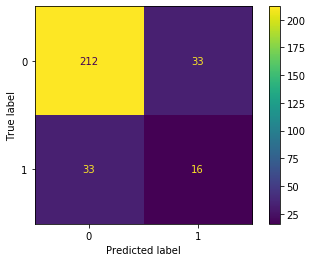

In [16]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()  

También podemos generar diferentes métricas de rendimiento, como el recall, la precisión y la puntuación F1. 

In [17]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.78
Recall: 0.32653061224489793
Precisión: 0.32653061224489793
Puntuación F1: 0.32653061224489793


Para tener una panorama completo podemos generar un reporte.

In [18]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       245
           1       0.33      0.33      0.33        49

    accuracy                           0.78       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.78      0.78      0.78       294



Podemos observar que, a pesar de que la medida global de exactitud ofrece un rendimiento de 78% de clasificaciones correctas, este no se refleja en la clase minoritaria (Renuncia = 1). Esto es debido al desbalance entre las clases. 

En general, el desbalance entre las clases en un conjunto de datos puede presentarse por diversas razones, algunas de ellas relacionadas con la naturaleza del problema, donde este desbalance es el resultado directo de las características de la población que genera los datos o el costo y/o dificultad en la obtención de datos de la clase de interés. 

En estos escenarios es muy importante obtener modelos que exhiban un buen rendimiento de predicción sobre la clase minoritaria ya que esta, por lo general, representa el objetivo o target de la tarea de clasificación. Sin embargo, los algoritmos de aprendizaje tradicionales tenderán a producir una solución que sólo tendrá un buen desempeño sobre la clase mayoritaria. Esto es debido a que están diseñados para inducir un modelo de clasificación basado en el error que se comete sobre todo el conjunto de entrenamiento, sin tomar en cuenta la representatividad o balance de las clases.

Para resolver este problema se han propuesto diversas estrategias como el remuestreo del conjunto de datos o la construcción de clasificadores que tomen en cuenta el costo de los errores sobre las diferentes clases. En particular, para árboles de decisión, scikit-learn ofrece la posibilidad de indicarle al algoritmo que maneje el desbalance internamente con el parámetro "class_weight". Veamos como usarlo:

In [19]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=0)
arbol = arbol.fit(X_train,Y_train)
y_pred = arbol.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       245
           1       0.34      0.35      0.34        49

    accuracy                           0.78       294
   macro avg       0.60      0.61      0.61       294
weighted avg       0.78      0.78      0.78       294



Vemos que mejora un poco el rendimiento sobre la clase minoritaria. También podrías aplicar técnicas de remuestreo, pero su estudio está fuera del alcance de este curso. Sin embargo, para mayor información puedes revisar el siguiente enlace "https://imbalanced-learn.org/stable/".

### 4. Construcción del modelos con búsqueda de hiperparámetros.
En el caso de los árboles de decisión los hiperparámetros principales que hay que ajustar están relacionados con aquellos que controlan la complejidad, pero también el criterio o medida de pureza puede afectar su rendimiento. En general, estos son:  

* **criterion** : {“gini”, “entropy”}, predeterminado = "gini".

La función para medir la calidad de una división. Los criterios admitidos son "gini" y "entropía".

* **max_depth:** int, predeterminado=None.

La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

* **min_samples_split** : int or float, predeterminado=2.

El número mínimo de muestras necesarias para dividir un nodo interno

Para determinar los mejores valores de estos hiperparámetros vamos a realizar la búsqueda utilizando la función GridSearchCV.

In [20]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [21]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10],'min_samples_split':[2, 3, 4, 5]}

In [22]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [23]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_split': [2, 3, 4, 5]})

In [24]:
# Podemos ver cual fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

In [25]:
# Obtener el mejor modelo.
modelo_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred = modelo_final.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       245
           1       0.34      0.45      0.39        49

    accuracy                           0.77       294
   macro avg       0.61      0.64      0.62       294
weighted avg       0.79      0.77      0.78       294



### 5. Predicciones y probabilidad

Una vez obtenido el modelo de árbol de decisión también podríamos obtener la probabilidad de que un dato sea clasificado como de una clase particular. 

In [26]:
# Por ejemplo, tomemos un dato del conjunto de test y apliquemos el método "predict_proba".
y_pred_test = modelo_final.predict_proba(X_test.iloc[[20]])

In [27]:
print(y_pred_test)

[[0.10801051 0.89198949]]


In [28]:
# Para saber el orden de las clases puedes utilizar el atributo "classes_" del modelo:
modelo_final.classes_

array([0, 1])

[![Banner-Modelos.png](https://i.postimg.cc/RCgy2XdL/Banner-Modelos.png)](https://postimg.cc/PN8SwbBC)